# Module 1

## Hello World

In [1]:
import tensorflow as tf
tf.__version__

'1.12.0-rc0'

In [2]:
a = tf.constant([2])
b = tf.constant([3])

In [3]:
c = tf.add(a, b)

In [4]:
session = tf.Session()
result = session.run(c)
print(result)
session.close()

[5]


In [5]:
with tf.Session() as session:
    print(session.run(c))

[5]


## Tensors, Variables and Placeholders

In [9]:
scalar = tf.constant([3])
vector = tf.constant([3, 4, 5])
matrix = tf.constant([[3, 4, 5], [6, 7, 8], [6, 7, 8]])
tensor = tf.constant([[[3, 4, 5], [6, 7, 8]], [[9, 10, 11], [12, 13, 14]]])
with tf.Session() as sess:
    print(sess.run(scalar))
    print(sess.run(vector))
    print(sess.run(matrix))
    print(sess.run(tensor))

[3]
[3 4 5]
[[3 4 5]
 [6 7 8]
 [6 7 8]]
[[[ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]]]


In [10]:
first_operation = tf.matmul(matrix, matrix)
with tf.Session() as sess:
    print(sess.run(first_operation))

[[ 63  75  87]
 [108 129 150]
 [108 129 150]]


In [13]:
state = tf.Variable(0)
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    print(sess.run(init_op))
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

None
0
1
2
3
4
5


In [20]:
a = tf.placeholder(tf.int8)
b = tf.multiply(a, 2)
with tf.Session() as sess:
    print(sess.run(b, feed_dict={a: [[3, 4, 5], [6, 7, 8], [6, 7, 8]]}))

[[ 6  8 10]
 [12 14 16]
 [12 14 16]]


## Linear Regression

For a linear regression we will:
1. Define a set of points in a linear scale to be x
2. Define the linear variables we want for the line (a and b in ax + b = y)
3. Define the execution graph and perform the regression
4. To make it more realistic we will also add noise to the input
5. Re-execute the same graph to obtain the results

Q: Generating x_data with np.linspace(0,100,num=100, dtype=np.float32) makes the model never converge. Why?
A: NN works better with small numbers. The fuction above generates a range of number either in x and y too large. A technique of data pre-processing with max-min could easily solve this. Changing the range far from \[0,1\] makes the model either slowly converge (if smaller than 1) or diverge (if bigger than one)

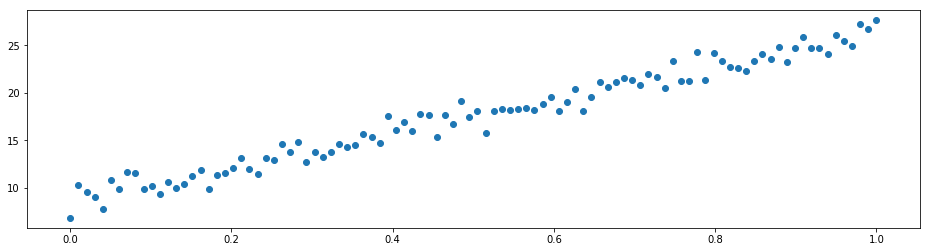

In [60]:
import numpy as np
x_data = np.linspace(0, 1, num=100, dtype=np.float32)
# x_data = np.random.rand(100).astype(np.float32)
a_true = 17.5
b_true = 8.173
y_data = a_true*x_data + b_true
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.5, scale=1.0))(y_data) #Add gaussian noise

import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.scatter(x_data, y_data)
plt.show()

In [61]:
import tensorflow as tf
a = tf.Variable(1.1, dtype=tf.float64)
b = tf.Variable(1.0, dtype=tf.float64)
y = a * x_data + b #Here we know the equation

loss = tf.reduce_mean(tf.square(y - y_data)) #MSE

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
train_data = []
with tf.Session() as sess:
    sess.run(init)
    for step in range(100):
        evals = sess.run([train, a, b])[1:]
        if step % 10 == 0:
            print(step, evals)
            train_data.append(evals)

0 [1.1, 1.0]
10 [12.92153475296599, 11.186335636307346]
20 [15.39069223211969, 9.863061143923437]
30 [16.62417047306077, 9.201997922203514]
40 [17.240363111853732, 8.871759189555181]
50 [17.548186432531573, 8.706786132591404]
60 [17.701961714460857, 8.624372693968633]
70 [17.778781226641932, 8.583202487204991]
80 [17.81715694852454, 8.562635623920476]
90 [17.836327807440433, 8.552361304245764]


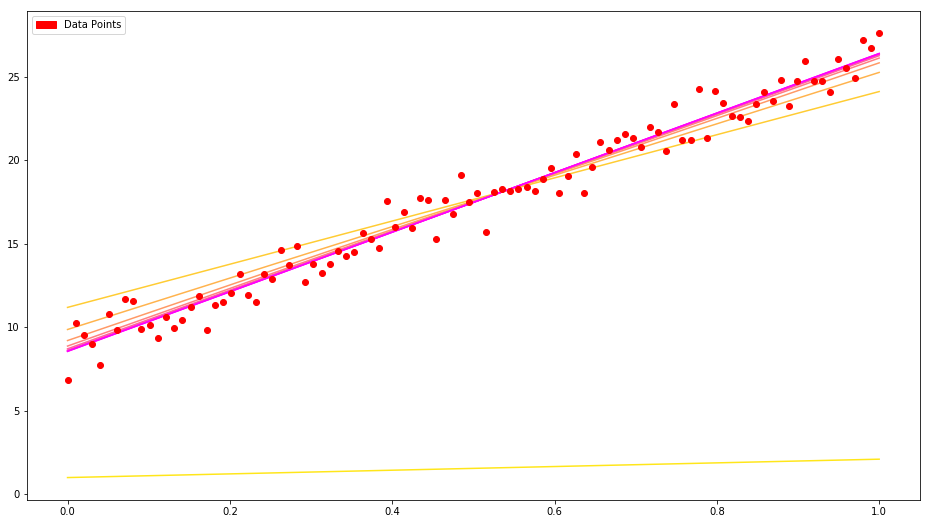

In [62]:
import matplotlib.patches as mpatches
# converter = plt.colors
plt.figure(figsize=(16,9))
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

## Non-Linear Regression

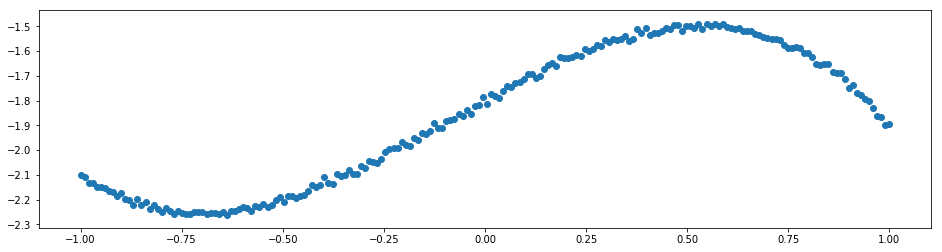

In [101]:
import numpy as np
x_data = np.linspace(-1, 1, num=200, dtype=np.float32)
# x_data = np.random.rand(200).astype(np.float32)
a_true = -0.8
b_true = -0.2
c_true = 0.9
d_true = -1.8
y_data = a_true*(x_data**3) + b_true * (x_data**2) + c_true * x_data + d_true
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.01))(y_data) #Add gaussian noise

import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.scatter(x_data, y_data)
plt.show()

In [102]:
import tensorflow as tf
x = tf.placeholder(tf.float32, shape=(x_data.size))
y = tf.placeholder(tf.float32,shape=(y_data.size))

a = tf.Variable(1.0)
b = tf.Variable(1.0)
c = tf.Variable(1.0)
d = tf.Variable(1.0)

x3 = tf.multiply(a, tf.pow(x, 3))
x2 = tf.multiply(b, tf.pow(x, 2))
x1 = tf.multiply(c, x)
x0 = d
y_pred = tf.add(x3, tf.add(x2, tf.add(x1, x0)))

loss = tf.reduce_mean(tf.squared_difference(y_pred,y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss)
train_data = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1001):
        vars_temp = sess.run([train,loss, a, b, c, d], feed_dict={x:x_data, y:y_data})
        if i % 100 == 0:
            train_data.append(vars_temp)
            print(f'{i}\tloss:{vars_temp[1]:.5f} {vars_temp[2]:.3f}x^3 + {vars_temp[3]:.3f}x^2 + {vars_temp[4]:.3f}x + {vars_temp[5]:.3f}')
        

0	loss:10.94789 1.000x^3 + 1.000x^2 + 1.000x + 1.000
100	loss:0.00128 -0.577x^3 + -0.203x^2 + 0.758x + -1.799
200	loss:0.00014 -0.760x^3 + -0.203x^2 + 0.874x + -1.799
300	loss:0.00010 -0.792x^3 + -0.203x^2 + 0.895x + -1.799
400	loss:0.00010 -0.798x^3 + -0.203x^2 + 0.899x + -1.799
500	loss:0.00010 -0.799x^3 + -0.203x^2 + 0.900x + -1.799
600	loss:0.00010 -0.800x^3 + -0.203x^2 + 0.900x + -1.799
700	loss:0.00010 -0.800x^3 + -0.203x^2 + 0.900x + -1.799
800	loss:0.00010 -0.800x^3 + -0.203x^2 + 0.900x + -1.799
900	loss:0.00010 -0.800x^3 + -0.203x^2 + 0.900x + -1.799
1000	loss:0.00010 -0.800x^3 + -0.203x^2 + 0.900x + -1.799


In [103]:
train_data

[[None, 10.947888, 1.0, 1.0, 1.0, 1.0],
 [None, 0.001281764, -0.5771725, -0.20251937, 0.7580557, -1.7987496],
 [None, 0.00013695526, -0.7595589, -0.20255384, 0.8744539, -1.798737],
 [None, 9.9696845e-05, -0.7924623, -0.20255402, 0.8954527, -1.7987369],
 [None, 9.848407e-05, -0.7983981, -0.20255402, 0.89924085, -1.7987369],
 [None, 9.84445e-05, -0.7994689, -0.20255402, 0.8999243, -1.7987369],
 [None, 9.844339e-05, -0.79966205, -0.20255402, 0.90004754, -1.7987369],
 [None, 9.84433e-05, -0.79969686, -0.20255402, 0.9000698, -1.7987369],
 [None, 9.8443335e-05, -0.7997028, -0.20255402, 0.9000735, -1.7987369],
 [None, 9.8443335e-05, -0.7997028, -0.20255402, 0.9000735, -1.7987369],
 [None, 9.8443335e-05, -0.7997028, -0.20255402, 0.9000735, -1.7987369]]

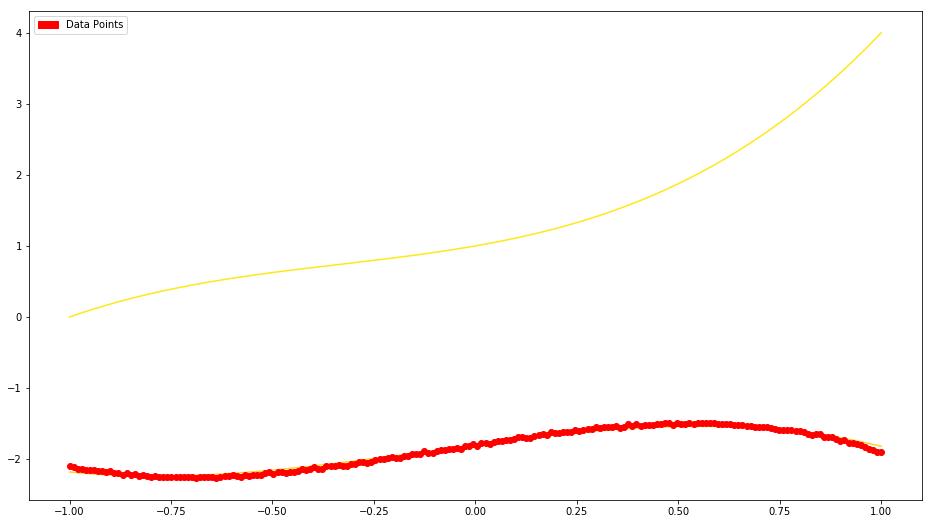

In [105]:
import matplotlib.patches as mpatches

plt.figure(figsize=(16,9))
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [train, loss, a, b, c, d] = f
    f_y = np.vectorize(lambda x: a*(x**3) + b*(x**2) + c*x + d)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

## Logistic Regression

[]

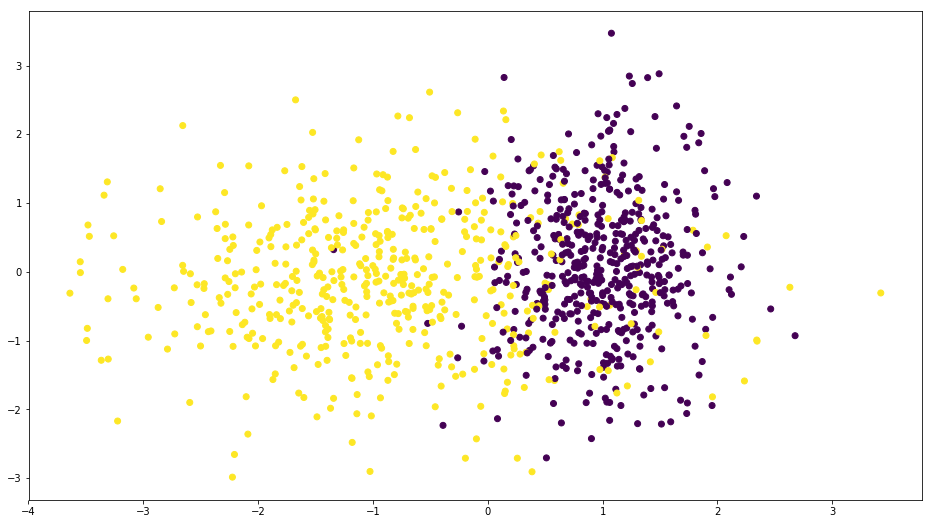

In [166]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

# X1, Y1 = make_circles(noise=0.1, factor=0.1, random_state=1, n_samples=1000)
X1, Y1 = make_classification(n_features=3, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples = 1000)
plt.figure(figsize=(16, 9))
plt.scatter(X1[:, 0], X1[:, 1], c=Y1)
plt.plot()



In [167]:
y_train.shape[1]

2

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X1, pd.get_dummies(Y1), test_size=0.33, random_state=42)
numFeatures = X_train.shape[1] #2 in our case
numLabels = y_train.shape[1] #2 in our case

X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))
activation_OP = tf.nn.sigmoid(tf.add(tf.matmul(X, weights), bias), name='sigmoid_activation')
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(0.5).minimize(cost_OP)


correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

In [170]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost = 0
    diff = 1
    # Training epochs
    for i in range(1000):
        if i > 1 and diff < .0001:
            print("change in cost %g; convergence."%diff)
            print(sess.run([training_OP, accuracy_OP], feed_dict={X: X_test, yGold: y_test}))
            break
        else:
            # Run training step
            step, loss = sess.run([training_OP, cost_OP], feed_dict={X: X_train, yGold: y_train})
            diff = abs(loss - cost)
            cost = loss
            # Report occasional stats
            if i % 100 == 0:
                #generate print statements
                print(i, loss)

0 165.88275
100 24.076544
200 15.217181
300 15.015371
400 14.993
500 14.971097
600 14.796322
700 12.5684185
800 3.8443449
change in cost 9.60827e-05; convergence.
[None, 0.9848485]
